## PLOTLY

In [ ]:
 #pip install plotly


## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import plotly as py

## READ FILE

In [6]:
data = pd.read_csv("C:\\Users\\sweta\\Desktop\\sample.csv")
#print(data)
len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
DocID               100 non-null object
SetID               100 non-null object
NDCCode             100 non-null object
NDCName             100 non-null object
GenericName         0 non-null float64
FormCode            0 non-null float64
FormName            0 non-null float64
IngredientStatus    100 non-null object
IngredientCode      100 non-null object
SubstanceName       100 non-null object
Dose                0 non-null float64
unit                100 non-null object
MoietyName          0 non-null float64
MoietyCode          0 non-null float64
SPECIFICATION       100 non-null object
dtypes: float64(6), object(9)
memory usage: 11.8+ KB


## READ FILE

In [23]:
import csv
Data  = open("C:\\Users\\sweta\\Desktop\\sample.csv", "r", encoding='utf8')

read = csv.reader(Data)
print(read)



                                             NDCName           SubstanceName
0  BodycologyExotic Cherry Kit\n                 ...                   WATER
1  BodycologyExotic Cherry Kit\n                 ...  SODIUM LAURETH SULFATE
2  BodycologyExotic Cherry Kit\n                 ...  COCAMIDOPROPYL BETAINE
3  BodycologyExotic Cherry Kit\n                 ...          ALOE VERA LEAF
4  BodycologyExotic Cherry Kit\n                 ...                   HONEY


## FEATURE EXTRACTON

In [50]:
network = data.drop(["DocID","SetID","NDCCode","GenericName","FormCode","FormName","IngredientStatus","IngredientCode","Dose","unit","MoietyName","MoietyCode","SPECIFICATION"],axis=1)
print(network.head(5))

                                             NDCName           SubstanceName
0  BodycologyExotic Cherry Kit\n                 ...                   WATER
1  BodycologyExotic Cherry Kit\n                 ...  SODIUM LAURETH SULFATE
2  BodycologyExotic Cherry Kit\n                 ...  COCAMIDOPROPYL BETAINE
3  BodycologyExotic Cherry Kit\n                 ...          ALOE VERA LEAF
4  BodycologyExotic Cherry Kit\n                 ...                   HONEY


In [34]:
lables=["NDCName","SubstanceName"]

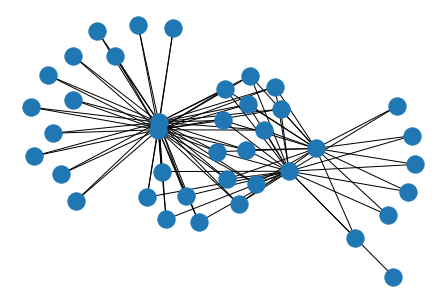

In [46]:
import networkx as nx
import plotly.graph_objects as go

edge_trace = go.Scatter(
    x=network["NDCName"],
    y=network["SubstanceName"],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    text=lables,
    mode='lines')

nx.draw(G)
plt.show()

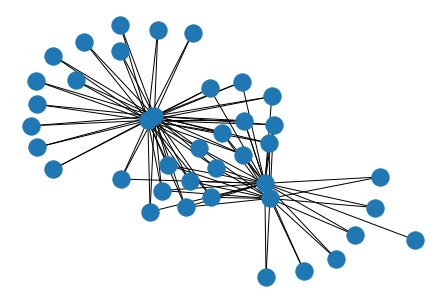

In [43]:
A = list(network["NDCName"].unique())
B = list(network["SubstanceName"].unique())
node_list = list(set(A+B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
    
for i,j in network.iterrows():
    G.add_edges_from([(j["NDCName"],j["SubstanceName"])])
    
nx.draw(G)
plt.show()

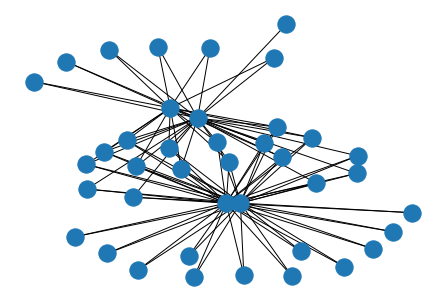

In [45]:
pos = nx.spring_layout(G, k=0.5, iterations=50)  #spectral_layout,fruchterman_reingold_layout
for n, p in pos.items():
    G.node[n]['pos'] = p
    
nx.draw(G)
plt.show()

In [55]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

G=nx.karate_club_graph()

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [22]:
import networkx as nx
import plotly.graph_objects as go

import csv



Data  = open("C:\\Users\\sweta\\Desktop\\sample.csv", "r", encoding='utf8')

read = csv.reader(Data)
print(read)

network = data.drop(["DocID","SetID","NDCCode","GenericName","FormCode","FormName","IngredientStatus","IngredientCode","Dose","unit","MoietyName","MoietyCode","SPECIFICATION"],axis=1)
print(network.head(5))

Graphtype=nx.Graph()

G = nx.read_edgelist(network, create_using=Graphtype, nodetype=int, data=(('weight',float),))

for x in G.nodes():
      print ("Node:", x, "has total #degree:",G.degree(x), " , In_degree: ", G.out_degree(x)," and out_degree: ", G.in_degree(x))   
for u,v in G.edges():
      print ("Weight of Edge ("+str(u)+","+str(v)+")", G.get_edge_data(u,v))

nx.draw(G)
plt.show()

                                             NDCName           SubstanceName
0  BodycologyExotic Cherry Kit\n                 ...                   WATER
1  BodycologyExotic Cherry Kit\n                 ...  SODIUM LAURETH SULFATE
2  BodycologyExotic Cherry Kit\n                 ...  COCAMIDOPROPYL BETAINE
3  BodycologyExotic Cherry Kit\n                 ...          ALOE VERA LEAF
4  BodycologyExotic Cherry Kit\n                 ...                   HONEY


AttributeError: 'str' object has no attribute 'decode'